# 08CaseCOVID19V2

# Libraries

In [154]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from IPython.display import display

# Loading Data

In [155]:
case = pd.read_csv(
    "C:\py\Projects\TuringCollege\COVID19\DataSets\\case.csv",
    index_col=False,
    skipinitialspace=True,
)

# Display Data

In [156]:
pd.set_option("max_rows", None)

# Size

In [157]:
case.shape

(174, 8)

# Missing Data

In [158]:
case.isna().sum()

case_id           0
province          0
city              0
group             0
infection_case    0
confirmed         0
latitude          0
longitude         0
dtype: int64

# Delete Unneeded Columns

In [159]:
case = case.drop(["case_id", "city", "group", "latitude", "longitude"], axis=1)

# Delete Unneeded Row

In [160]:
case = case[case.infection_case != 'etc']

# Rename Columns

In [161]:
case.rename(
    columns={
        "province": "Province",
        "infection_case": "Infection Reason",
        "confirmed": "Confirmed",
    },
    inplace=True,
)

# Rename Column Values

In [162]:
case.replace('contact with patient', 'Contact with Patient', inplace=True)
case.replace('overseas inflow', 'Overseas Inflow', inplace=True)
case.replace('gym facility in Cheonan', 'Gym Facility in Cheonan', inplace=True)
case.replace('Door-to-door sales in Daejeon', 'Door-to-Door Sales in Daejeon', inplace=True)
case.replace('gym facility in Cheonan', 'Gym Facility in Cheonan', inplace=True)
case.replace('Geumcheon-gu rice milling machine manufacture', 'Geumcheon-gu Rice Milling Machine Manufacture', inplace=True)
case.replace('Lotte Confectionery logistics center', 'Lotte Confectionery Logistics Center', inplace=True)
case.replace('gym facility in Sejong', 'Gym Facility in Sejong', inplace=True)
case.replace('Seoul City Hall Station safety worker', 'Seoul City Hall Station Safety Worker', inplace=True)
case.replace('Gangnam Yeoksam-dong gathering', 'Gangnam Yeoksam-dong Gathering', inplace=True)
case.replace('Seongnam neighbors gathering', 'Seongnam neighbors Gathering', inplace=True)
case.replace('Eunpyeong-Boksagol culture center', 'Eunpyeong-Boksagol Culture Center', inplace=True)
case.replace('Biblical Language study meeting', 'Biblical Language Study Meeting', inplace=True)
case.replace('Daejeon door-to-door sales', 'Daejeon Door-to-Door Sales', inplace=True)

# Dataset

In [163]:
pd.set_option("max_rows", None)

In [164]:
case.head()

,Province,Infection Reason,Confirmed
0,Seoul,Itaewon Clubs,139
1,Seoul,Richway,119
2,Seoul,Guro-gu Call Center,95
3,Seoul,Yangcheon Table Tennis Club,43
4,Seoul,Day Care Center,43


# Confirmed Cases in South Korea

In [165]:
pivot_infection = pd.pivot_table(
    data=case, 
    index=["Infection Reason"], 
    values="Confirmed", 
    aggfunc="sum"
).sort_values("Confirmed", ascending=False)

total = pivot_infection["Confirmed"].sum()

# Confirmed Cases in Daegu Province

In [167]:
pivot_province = pd.pivot_table(
    data=case, 
    index=["Province"], 
    values="Confirmed", 
    aggfunc="sum"
).sort_values("Confirmed", ascending=False)

daegu = pivot_province.loc["Daegu"]
daegu = daegu["Confirmed"]
other_provinces = total - daegu

# Confirmed Cases Linked to Shincheonji Church in Daegu Province

In [170]:
pivot_province = pd.pivot_table(
    data=case, index=["Province"], values="Confirmed", aggfunc="sum"
).sort_values("Confirmed", ascending=False)


daegu = pivot_province.loc["Daegu"]
daegu = daegu["Confirmed"]


shincheonji_church_daegu = case.loc[
    (case["Province"] == "Daegu") & (case["Infection Reason"] == "Shincheonji Church")
]
shincheonji_church_daegu = shincheonji_church_daegu.set_index("Infection Reason")
shincheonji_church_daegu = shincheonji_church_daegu.loc["Shincheonji Church"]
shincheonji_church_daegu = shincheonji_church_daegu["Confirmed"]

other_daegu = daegu - shincheonji_church_daegu

# Confirmed Cases Linked to Shincheonji Church in South Korea

In [171]:
shincheonji_church = pivot_infection.loc["Shincheonji Church"]
shincheonji_church = shincheonji_church["Confirmed"]

other_overall = total - shincheonji_church

# Pie Charts

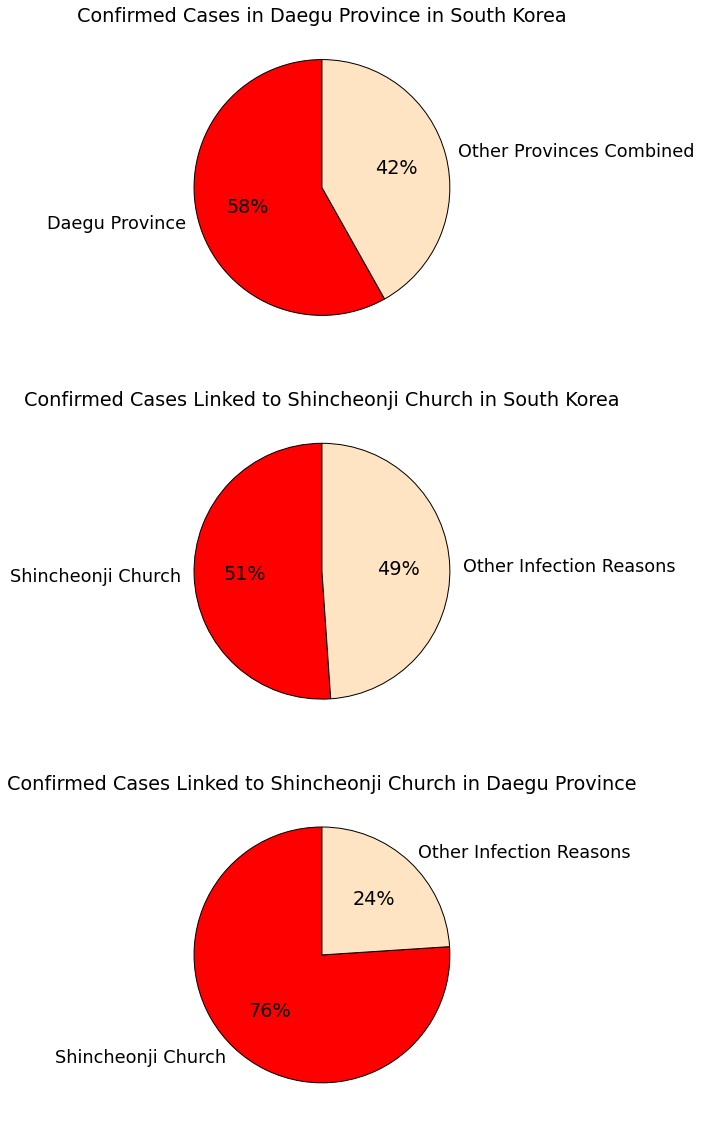

In [180]:
ord_color = "bisque"
spec_lev1 = "red"
sns.set_context("paper", font_scale=2.0)

data_1 = [shincheonji_church, other_overall]
labels_1 = ['Shincheonji Church', 'Other Infection Reasons']
colors_1 = [spec_lev1, ord_color]

data_2 = [shincheonji_church_daegu, other_daegu]
labels_2 = ['Shincheonji Church', 'Other Infection Reasons']
colors_2 = [spec_lev1, ord_color]

data_3 = [daegu, other_provinces]
labels_3 = ['Daegu Province', 'Other Provinces Combined']
colors_3 = [spec_lev1, ord_color]

fig, (ax3, ax1, ax2) = plt.subplots(nrows=3, ncols=1, figsize=(7,20))

ax1.set_title("Confirmed Cases Linked to Shincheonji Church in South Korea")
ax2.set_title("Confirmed Cases Linked to Shincheonji Church in Daegu Province")
ax3.set_title("Confirmed Cases in Daegu Province in South Korea")

ax1.pie(
    data_1,
    labels=labels_1,
    colors=colors_1,
    startangle=90,
    autopct="%0.0f%%",
    wedgeprops={"edgecolor": "black", "linewidth": 1},
);


ax2.pie(
    data_2,
    labels=labels_2,
    colors=colors_2,
    startangle=90,
    autopct="%0.0f%%",
    wedgeprops={"edgecolor": "black", "linewidth": 1},
);



ax3.pie(
    data_3,
    labels=labels_3,
    colors=colors_3,
    startangle=90,
    autopct="%0.0f%%",
    wedgeprops={"edgecolor": "black", "linewidth": 1},
);


plt.show();